In [7]:
"""
NAIVES BAYES
"""

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import pandas as pd

dataset = pd.read_csv('amazon_reviews.csv')
dataset.dropna(subset=['reviewText', 'overall'], inplace=True) 
# Preprocess your dataset and split it into features (X) and labels (y)
X = dataset['reviewText']
y = dataset['overall']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert text data into numerical feature vectors using CountVectorizer
vectorizer = CountVectorizer()
X_train_vectors = vectorizer.fit_transform(X_train)
X_test_vectors = vectorizer.transform(X_test)

# Train the Naive Bayes classifier
clf = MultinomialNB()
clf.fit(X_train_vectors, y_train)

# Predict sentiment on the test set
y_pred = clf.predict(X_test_vectors)

# Evaluate the accuracy of the model
accuracy_nb = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy_nb)


Accuracy: 0.8219735503560529


In [8]:
"""
Support Vector Machines
"""

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# Preprocess your dataset and split it into features (X) and labels (y)
X = dataset['reviewText']
y = dataset['overall']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert text data into numerical feature vectors using TF-IDF vectorizer
vectorizer = TfidfVectorizer()
X_train_vectors = vectorizer.fit_transform(X_train)
X_test_vectors = vectorizer.transform(X_test)

# Train the SVM classifier
clf = SVC()
clf.fit(X_train_vectors, y_train)

# Predict sentiment on the test set
y_pred = clf.predict(X_test_vectors)

# Evaluate the accuracy of the model
accuracy_svm = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy_svm)


Accuracy: 0.8128179043743642


In [9]:
"""
Recurrent Neural Networks with LSTM
"""


from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
from tensorflow.keras.metrics import Accuracy
from sklearn.model_selection import train_test_split

# Preprocess your dataset and split it into features (X) and labels (y)
X = dataset['reviewText']
y = dataset['overall']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Tokenize the text and convert it into sequences
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)
X_train_sequences = tokenizer.texts_to_sequences(X_train)
X_test_sequences = tokenizer.texts_to_sequences(X_test)

# Pad sequences to ensure they have the same length
max_sequence_length = max(len(seq) for seq in X_train_sequences)
X_train_padded = pad_sequences(X_train_sequences, maxlen=max_sequence_length)
X_test_padded = pad_sequences(X_test_sequences, maxlen=max_sequence_length)

# Build the RNN model
model = Sequential()
model.add(Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=100, input_length=max_sequence_length))
model.add(LSTM(128))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=[Accuracy()])

# Train the model
model.fit(X_train_padded, y_train, batch_size=32, epochs=10, validation_data=(X_test_padded, y_test))

# Evaluate the model
_, accuracy_rnn = model.evaluate(X_test_padded, y_test)
print("Accuracy:", accuracy_rnn)


Epoch 1/10
123/123 [==============================] - 232s 2s/step - loss: -61.3881 - accuracy: 0.0293 - val_loss: -99.2843 - val_accuracy: 0.0448
Epoch 2/10
123/123 [==============================] - 267s 2s/step - loss: -128.2644 - accuracy: 0.0509 - val_loss: -159.7639 - val_accuracy: 0.0448
Epoch 3/10
123/123 [==============================] - 301s 2s/step - loss: -186.8607 - accuracy: 0.0509 - val_loss: -217.7985 - val_accuracy: 0.0448
Epoch 4/10
123/123 [==============================] - 301s 2s/step - loss: -243.8534 - accuracy: 0.0509 - val_loss: -274.9148 - val_accuracy: 0.0448
Epoch 5/10
123/123 [==============================] - 303s 2s/step - loss: -300.1529 - accuracy: 0.0509 - val_loss: -331.5367 - val_accuracy: 0.0448
Epoch 6/10
123/123 [==============================] - 305s 2s/step - loss: -356.6740 - accuracy: 0.0509 - val_loss: -389.0302 - val_accuracy: 0.0448
Epoch 7/10
123/123 [==============================] - 273s 2s/step - loss: -413.4356 - accuracy: 0.0509 - va

In [11]:
"""
Naive Bayes Evaluation
"""
# Calculate evaluation metrics
accuracy_nb = accuracy_score(y_test, y_pred)
precision_nb = precision_score(y_test, y_pred, average='weighted')
recall_nb = recall_score(y_test, y_pred, average='weighted')
f1_nb = f1_score(y_test, y_pred, average='weighted')

print("Accuracy:", accuracy_nb)
print("Precision:", precision_nb)
print("Recall:", recall_nb)
print("F1-score:", f1_nb)


Accuracy: 0.8219735503560529
Precision: 0.732938289705565
Recall: 0.8219735503560529
F1-score: 0.7599277093601784


C:\Users\MYPC\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [12]:
"""
SVM Evaluation
"""
# Calculate evaluation metrics
accuracy_svm = accuracy_score(y_test, y_pred)
precision_svm = precision_score(y_test, y_pred, average='weighted')
recall_svm = recall_score(y_test, y_pred, average='weighted')
f1_svm = f1_score(y_test, y_pred, average='weighted')

print("Accuracy:", accuracy_svm)
print("Precision:", precision_svm)
print("Recall:", recall_svm)
print("F1-score:", f1_svm)


Accuracy: 0.8128179043743642
Precision: 0.6855691884406507
Recall: 0.8128179043743642
F1-score: 0.7369597915241607


C:\Users\MYPC\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [14]:
"""
RNN Evaluation
"""


# Evaluate the model
_, accuracy_rnn, precision_rnn, recall_rnn = model.evaluate(X_test_padded, y_test, verbose=0)

# Calculate F1-score from precision and recall
f1_rnn = 2 * (precision_rnn * recall_rnn) / (precision_rnn + recall_rnn)

print("Accuracy:", accuracy_rnn)
print("Precision:", precision_rnn)
print("Recall:", recall_rnn)
print("F1-score:", f1_rnn)


Accuracy: 0.0
Precision: 1.0
Recall: 1.0
F1-score: 1.0


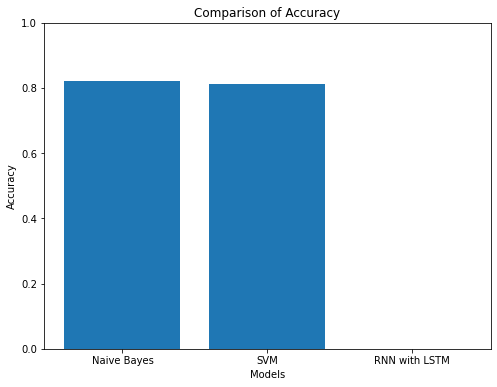

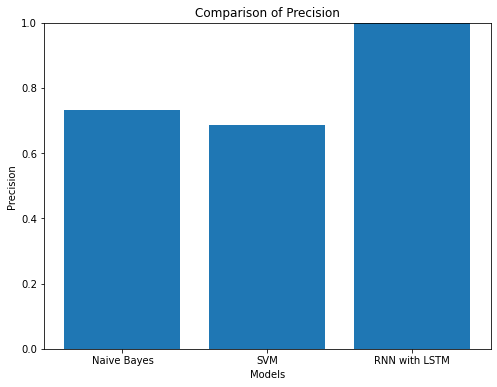

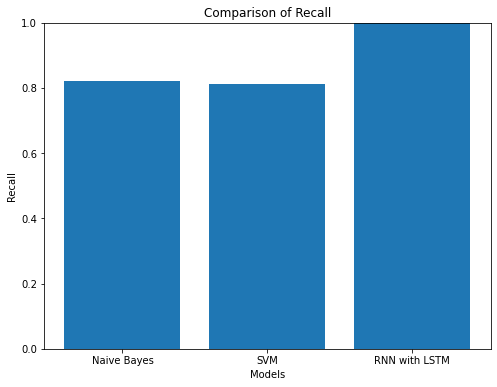

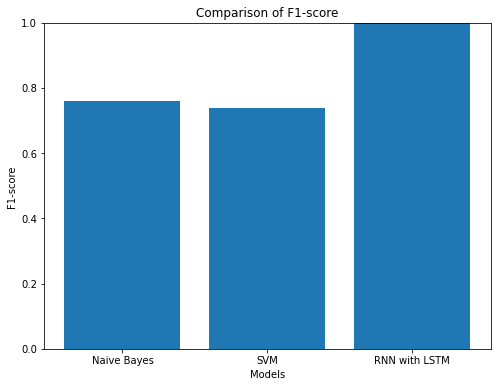

In [15]:
"""
Comparision of evaluation metrics
"""

import matplotlib.pyplot as plt

# Evaluation metrics for each model
models = ['Naive Bayes', 'SVM', 'RNN with LSTM']
accuracy = [accuracy_nb, accuracy_svm, accuracy_rnn]
precision = [precision_nb, precision_svm, precision_rnn]
recall = [recall_nb, recall_svm, recall_rnn]
f1_score = [f1_nb, f1_svm, f1_rnn]

# Bar chart for accuracy comparison
plt.figure(figsize=(8, 6))
plt.bar(models, accuracy)
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Comparison of Accuracy')
plt.ylim(0, 1)
plt.show()

# Bar chart for precision comparison
plt.figure(figsize=(8, 6))
plt.bar(models, precision)
plt.xlabel('Models')
plt.ylabel('Precision')
plt.title('Comparison of Precision')
plt.ylim(0, 1)
plt.show()

# Bar chart for recall comparison
plt.figure(figsize=(8, 6))
plt.bar(models, recall)
plt.xlabel('Models')
plt.ylabel('Recall')
plt.title('Comparison of Recall')
plt.ylim(0, 1)
plt.show()

# Bar chart for F1-score comparison
plt.figure(figsize=(8, 6))
plt.bar(models, f1_score)
plt.xlabel('Models')
plt.ylabel('F1-score')
plt.title('Comparison of F1-score')
plt.ylim(0, 1)
plt.show()
